<a href="https://colab.research.google.com/github/pham-andrew/MachineLearningIntroExercise/blob/main/MachineLearningIntroExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch

## The goal of this assignment is to develop the following:



*   Familiarity with the overarching ideas of deep learning architectures
*   Understanding of the low-level details of tensor manipulation and applying gradients in the Pytorch environment
*   Ability to create a neural network architecture using the Sequential container in PyTorch
*   Ability to access basic properties of pretrained networks such as Inception v3, AlexNet,
etc.
*  Understanding the scaling of various resources such as training time and data storage as a function of network size and type.

For this assignment, you should submit a colab notebook with your answers. Please use Python v3, not v2. For the free response parts of those questions, you should answer them as comments in your jupyter notebook code.

Questions marked as (grad) are required for grad credits, while questions marked as (optional) are fully optional and will give no extra credit.  


## Question 1: Network Architectures
### For each of the following neural network architectures, provide two examples where that architecture would be useful. Also briefly (1-2 sentences) explain why. 



1.   Multilayer Perceptron:

Two Examples:
MLPs are considered vanilla neural networks because they are one of the less complex models used, having an input layer, hidden layer, and output layer. Originally they were used in **binary classification** to determine if an input was part of a category and now this model helps us with complex tasks such as **optimizing fitness approximations**. The perceptron itself is a linear classifier and it produces a single output using linear combination of weights; thus, a multi layer perceptron can solve binary classification problem with ease since it actually only takes one layer to produce a linear output. A MLP is well equiped to solve nonlinear, stochastic, problems. Since the fitness apprixmation  in evolutionary computation is complex, it is better approximated with a nonlinear solution and better solved with a stochastic method.

2.   Convolutional Neural Network (CNN):

Convolutional neural networks are regularized MLPs. They are espeically strong at **image classification** and **natural language processing**. CNNs are able to take the complex patterns of MLPs and break them down into simplier patterns. For example, smaller sections of pixels in an image or multiple patterns of sentence strucutre.

3.   Recurrent Neural Network (RNN):

RNNs are directed graphics exhitibing temporal dynamic behavior. Applications of RNNs include **handwriting recognition** and **speech recognition**. An RNN is well suited to these tasks because they are strong at processing sequences of inputs. This is in part because of their use of gated memory allowing for feedback of sequences of data which will be explained next.

4.   Long Short-Term Memory Network (LSTM):

LSTMs are arguably the most broadly applicable network described so far, using techniques from all of the prior. Bloomberg Business reports applications as broad as "**predicting diseases** to **composing music**". This is because LSTMs can classify and make predictions on time series data, account for lags between events. They also help with the exploding and vanishing gradient problems we will describe later.

5.   (Grad) Generative adversarial network (GAN):

GANs are a class of machine learning where two neural networks contest eachother given a training set. This has proven to be exceptionally strong at generating realistic photographs. For this reason GANs have been used in applications like fashion and advertising to **generate photographs** of the product in studio quality and in videogames to **upscale 2d textures** to higher resolutions.

6.   (Optional) Think about the relationship between Hopfield Networks and RNNs? How did Hopfield network arise, and later influence the modern theory of machine learning?






## Question 2: ML Basics

1.    Draw a picture of what a gradient descent algorithm would look like for a function of one variable, say f(x) = x^2. Attach a picture of that sketch below: 

 ![Image](https://imgur.com/xOJ4tK0.png)


2.    What is a saddle point? Draw a sketch of one and attach a picture of that sketch below: 

 ![Image](https://imgur.com/wM597Db.png)

3.    What is minibatch size? What are the advantages/disadvantages of using a larger vs smaller minibatch size? Think about this from a systems perspective.

Minibatch sizes are a parameter in minibatch gradient descent which splits the training data into batches used to calculate error and update models. The minibatch size is the size of said batch of training data. The actual size of the batch is often related to the computation architecture of the memory requirements such as 32, 64, 128, etc. Small minibatches reduces training time at the cost of noise. Large minibatches have accurate estimates at the cost of training time.

4.     (Grad) Explain vanishing/exploding gradients. When does this occur and why.

Vanishing/exploding gradients are a common problem when we are trying to minimize loss on a graph. In the case of vanishing gradient, let's assume that the cost is very small. Once the gradient is calculated in respect to weight, the weight is updated proportionally to the gradient, which in this case is a very small update. More specifically, the gradient of a backpropagated weight is the product of derivatives from later in the network. If all of the products are less than one, we will have a very small number. Since this update is small, it's not going to help us reduce loss because it didn't update enough to get close to its optimal value. This impairs the entire network's ability to learn downstream of that weight. The opposite problem, exploding gradient, is when the product of back propogated weights is larger than 1, updating the weights too much and overshooting the optimal value of the weight.

5.     (Grad) Give a prescription for handling vanishing/exploding gradients. Why, naively, should this work?

We can use a different activation function such as ReLU that only saturates in one direction but the technique we talked more about in class was **long short-term memory**. Network activates in this model correspond to short term memory while weights corresponded to long term memory. Activations preserving information over long periods makes them "long term, short term, memory". The cells selectively update values and forget others using a input, output, and forget gates. LSTMs propagate an error signal referred to as a constant error or linear carousel that prevents the vanishing of gradient through many time steps, "remembering" when seeing vanishing gradient or "forgetting" when encountering exploding gradient.

## Question 3: Getting Familiar with NumPy

In [ ]:
# 1. Create a variable A that is equal to 2 x 3 matrix of zeroes of type Float32.
# Set the entry (1, 2) to be 3.14 and the entry (0, 1) to be 5.0.

import numpy as np

a=np.float32=[[0,0,0],
              [0,0,0]]

a[1][2]=2.14
a[0][1]=5.0

print(a)

[[0, 5.0, 0], [0, 0, 2.14]]


In [ ]:
# 2. Create a variable B that is the transpose (rows and columns are swapped) of the above matrix.

b=np.transpose(a)
print(b)

[[0.   0.  ]
 [5.   0.  ]
 [0.   2.14]]


In [ ]:
# 3. Create an array x of 100 points linearly spaced in the interval [-5, 5]

x = np.linspace(-5,5,100)
print(x)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

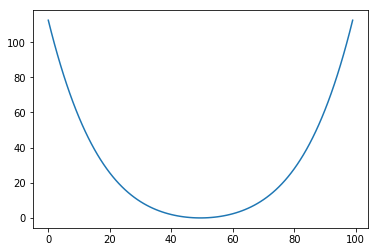

In [ ]:
# 4. Apply the function f(x) = 0.1 * x**4 + 2.0 * x**2 to the array of the previous problem. 
# Using a plotting package of your choice (e.g. matplot lib) 
# plot y as a function of the points x.

import matplotlib.pyplot as plt

def fx(x):
  return(0.1 * x**4 + 2.0 * x**2)
x=fx(x)
plt.plot(x)

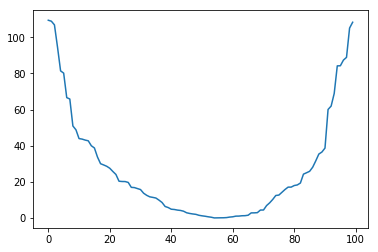

In [ ]:
# 5. Do the same, but this time with an array x of points that are 
# UNIFORMLY SAMPLED from the interval [-5,5]. 
# Apply the same f as above and plot this. 
# (make sure to sort x first so your plot makes sense!)

plt.plot(fx(np.sort(np.random.uniform(-5,5,100))))

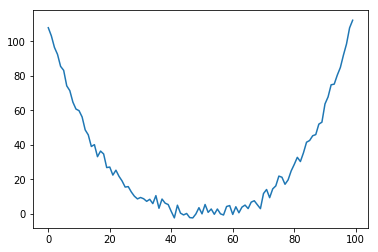

In [ ]:
# 6. Create an array of 100 points sampled from a normal distribution of mean 0 
# and standard deviation σ = 2.5. 
y = np.random.normal(0,2.5,100)

# Add this array to the array in the previous problem that corresponded to f(x). 
y += x

# Plot the new set of points against x.
plt.plot(y)

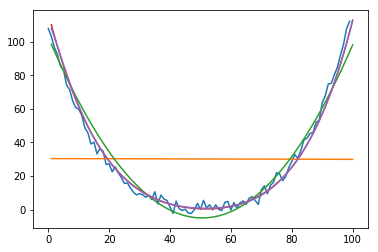

In [ ]:
# 7. Using the polyfit function of NumPy, give the polynomial of best fit 
# of degree 1, 2, 4 and 10 and plot them on top of the data. 

r=np.array(range(1,101))
p=np.poly1d(np.polyfit(r,y,1))
p2=np.poly1d(np.polyfit(r,y,2))
p4=np.poly1d(np.polyfit(r,y,4))
p10=np.poly1d(np.polyfit(r,y,10))
plt.plot(y)
plt.plot(r,p(r))
plt.plot(r,p2(r))
plt.plot(r,p4(r))
plt.plot(r,p10(r))

# In a couple of lines of comments, discuss the occurrence of under/overfitting.
# Underfitting using too few degrees results in a line like the orange one where we are poorly approximating the curve. Even the green one is a bit off.
# Overfitting is where the model follows every point too perfectly and while it may predict our training data perfectly, it will be off for test data

In [ ]:
# 8. (Grad) Using concepts from linear algebra, explain how polyfit works 
# at least in the case of linear regression.

# Polyfit gits a polynomial of a parameter degree to points x,y and
# returns a vector of coefficient p that minimises squared error.
# Mechanically, the function applys weighting and scales the left hand
# side to improve the condition number and solves for scale coefficients.
# Using higher degrees of polynomial equations, the curve fits to said
# degree of points. Using polynomial interpolation, it uses the lowest
# possible degree that passes through the poitns of the dataset.

## Question 4: PyTorch Basics

In [ ]:
# 1. First, create and print a torch.tensor object of the vector [.215,3,5.2]. 

import torch

t = torch.tensor([.215,3,5.2])
print(t)

# Now make it a numpy array first and then make it into a torch.tensor. 

t1 = np.array([.215,3,5.2])
torch.tensor(t1)
print(t1)

# Print that. Comment what you notice changes.
# It truncates the zeros off the end of the numbers and specifies dtype

tensor([0.2150, 3.0000, 5.2000])
[0.215 3.    5.2  ]


In [ ]:
# 2. Do this again for any 2 x 3 matrix.

t2=np.array=[[.215,3,5.2],
             [.215,3,5.2]]

torch.tensor(t2)
t2

# What happens if you don’t specify floats?
# ... nothing? TODO FIGURE THIS OUT

[[0.215, 3, 5.2], [0.215, 3, 5.2]]

In [ ]:
# 3. Now make a 2 x 2 x 2 matrix in python and turn this into a torch.tensor, 
# named T .
# The numbers in this tensor are labelled by 3 indices. 
# A tensor is any object (vector, matrix, etc.) with numbers labelled by 
# some number of N indices. 
# The indices label the different dimensions of that tensor.

T = [[[1., 2.], [3., 4.]],
    [[5., 6.], [7., 8.]]]
T = torch.tensor(T)
T

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

In [ ]:
# 4. Using the item() function, extract the value T at (0, 1, 1)

x = T[0][1][1]
x.item()

4.0

In [ ]:
# 5. From T , extract the sub-tensor of entries with first index equal to zero.
for i in range(2):
  for j in range(2):
    print(T[0][i][j].item())
print('\n')
    
# Now extract the sub-tensor of T with the second index equal to zero.
for i in range(2):
  for j in range(2):
    print(T[i][0][j].item())
print('\n')
    
# Finally, the sub-tensor of T with the third index equal to 1. 

for i in range(2):
  for j in range(2):
    print(T[i][j][1].item())

# Note that numpy indexing convention works in PyTorch too




1.0
2.0
3.0
4.0


1.0
2.0
5.0
6.0


2.0
4.0
6.0
8.0


In [ ]:
# 6. Convert T back into a 2 x 2 x 2 numpy array.
T = T.numpy()
T

array([[[1., 2.],
        [3., 4.]],

       [[5., 6.],
        [7., 8.]]], dtype=float32)

In [ ]:
# 7. The size of a tensor is an array of the lengths of each of its dimensions. 
# Make a tensor of all zeros of dimension 5 x 8 x 2, with data type long. 
T1 = torch.tensor(np.zeros((5,8,2),np.int_))

# Repeat this, but with random entries. 
tdata=np.random.rand(5,8,2)
T2 = torch.tensor(tdata)

# Confirm that this is its size by calling the size() function. 
print(tdata.size)
print(T2.size)
print(list(T2.size()))
print(T.shape)

# How long does it take to populate a tensor of d dimensions, each of length N. 
# It should take O(n^d) time to populate

# (Grad) In a comment, elaborate how this can connect to the curse of dimensionality
# As we can see, the complexity of adding another dimension exponentially increases
# the volume of data. This causes the data itself to become sparce in high dimensional
# systems. This sparcity is problematic for methods requiring statistical significance
# since the amount of data needed to support the result is a small percentage of the
# volume and the amount of data needed for it to be significant grows exponentially.

80
<built-in method size of Tensor object at 0x7fec998268b8>
[5, 8, 2]
torch.Size([5, 8, 2])


In [ ]:
# 8. Make two random tensors of the same size and add them.
# Try the same with two tensors of different sizes.

T1 = torch.tensor(np.random.rand(2))
T2 = torch.tensor(np.random.rand(2))
print(T1+T2)
print('\n')

T1 = torch.tensor(np.random.rand(2,2))
T2 = torch.tensor(np.random.rand(2))
print(T1+T2)

tensor([1.6239, 1.5771], dtype=torch.float64)


tensor([[0.9098, 0.2297],
        [0.8458, 0.7398]], dtype=torch.float64)


In [ ]:
# 9. Play around with the PyTorch tutorials on their website to get a bit 
# more familiar with the environment.

## Question 5: PyTorch Gradients

In [ ]:
# 1. Create a random 3 x 3 tensor A. Make it so that autograd is on. 
import torch.autograd as autograd

A = torch.tensor(np.random.rand(3,3,3))
A.requires_grad_()

# Using several intermediate tensors, create a new tensor, val, that is a scalar 
# with value equal to the mean of 3 (A^2 - 1)

sum=0.0
size=0

for i in range(2):
  for j in range(2):
    for k in range(2):
      sum+=3*(pow((A[i][j][k].item()),2)-1)
      size+=1

val = torch.tensor([sum/size])
val


tensor([-1.7984])

In [ ]:
# 2. Apply the backward function to out. Then, print out A.grad(). 
# Using what you know from calculus, explain why it has these values.

torch.autograd.backward(A,A)
print(A.grad)

tensor([[[1.3912, 2.4843, 1.7214],
         [2.6069, 2.2968, 2.7041],
         [2.6008, 0.5649, 1.8167]],

        [[0.8979, 1.7003, 1.2384],
         [1.3240, 1.7913, 2.1144],
         [1.5086, 0.6061, 1.9905]],

        [[1.0293, 2.3016, 1.2525],
         [1.6336, 1.6201, 2.8781],
         [2.8611, 2.2456, 2.4517]]], dtype=torch.float64)


## Question 6: MNIST Classifier

### In this exercise you will build your own model for classifying the MNIST data set.

In [ ]:
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

# 1. Create a deep neural network that classifies the MNIST data set using only 2 layers. 
# The image itself is an input of 28*28 = 784 floats
# Make a network that takes this and inputs it into a linear feedforward layer
# that consists of 1000 neurons
# Then, let the output of that go into a second layer, consisting of 10 neurons,
# Then, output the guess for which number it is (from 0-9) using the softmax
# function on the output of the second layer

# Use a ReLU activation function between layers.
# You might find the example code here helpful:
# https://github.com/pytorch/examples/tree/master/mnist


class MNIST_classifier(nn.Module):
    def __init__(self):
        super(MNIST_classifier, self).__init__()
        # Write the code defining the structure of the network here
        self.layer1=nn.Linear(28*28, 1000)
        self.layer2=nn.Linear(1000, 10)
        self.relu=nn.ReLU()
        
    def forward(self, x):
        # Define what a forward pass looks like here:
        # Erase the 'pass' keyword and insert your own code.
        x = images.view(-1,28*28)
        x = self.relu(self.layer1(x))
        x = self.layer2(x)
        return F.log_softmax(x, dim=1)

        # The backward() function is then defined for you autmatically via autograd
        

In [ ]:
# 2. Make the train function for the network using the mnist data set

# The training set is provided for you here: 
import torch
from torch.autograd import Variable
import time

batch_size = 64
n_epochs=1
model = MNIST_classifier()
cec_loss = nn.CrossEntropyLoss()
params = model.parameters()
optimizer = optim.SGD(params=params,lr=0.001)

training_set = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True)

t0=time.time()
for e in range(n_epochs):
    for i,(images,labels) in enumerate(training_set):
        images = Variable(images)
        labels = Variable(labels)
        output = model(images)
        model.zero_grad()
        loss = cec_loss(output,labels)
        loss.backward()
        optimizer.step()
        print(loss.item())
t1=time.time()
trainingtime=t1-t0
# Train the network using stochastic gradient descent and batch size 64.
# Note: you do not need to write your own optimizer, simply use SGD from pytorch

  0%|          | 16384/9912422 [00:00<01:11, 138888.95it/s]

9920512it [00:00, 30889457.08it/s]                           


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 432798.17it/s]
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 7257728.27it/s]                           
8192it [00:00, 177937.54it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
2.3011951446533203
2.2549197673797607
2.2668416500091553
2.2946689128875732
2.2581191062927246
2.2998902797698975
2.323154926300049
2.263850450515747
2.2803518772125244
2.257171154022217
2.2583508491516113
2.2380683422088623
2.2428722381591797
2.2097620964050293
2.2077600955963135
2.2024123668670654
2.227782964706421
2.2077293395996094
2.2277543544769287
2.2433996200561523
2.2120678424835205
2.1946959495544434
2.2119455337524414
2.2006287574768066
2.1930441856384277
2.227303981781006
2.186800241470337
2.215763568878174
2.182677984237671
2.213153123855591
2.218003511428833
2.192068099975586
2.2060720920562744
2.19384503364563
2.1335301399230957
2.1559488773345947
2.1771345138549805
2.1375784873962402
2.1502153873443604
2.1773900985717773
2.157555103302002
2.174555540084839
2.1652746200561523
2.1483306884765625
2.1512632369995117
2.1442806720733643
2.151430130

In [ ]:
# 3. Make a test function to test the accuracy of the trained network. 

from torch.autograd import Variable as var

# The test set is provided for you here: 
test_batch_size = 1000
test_set = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=test_batch_size, shuffle=True)

total = 0
correct = 0
for i,(images,labels) in enumerate(test_set):
    images = var(images.cpu())
    x = model(images)
    value,pred = torch.max(x,1)
    pred = pred.data.cpu()
    total += x.size(0)
    correct += torch.sum(pred == labels)

# What accuracy is achieved? 
print('Accuracty:')
print(correct.item()*100./total, end ="")
print('%')

# What is the size of the network (in MB)? 
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

# What is the training time?
print('Training time for 1 epoch:')
print(trainingtime, end ="")
print ('s')

Accuracty:
84.42%
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1000]         785,000
              ReLU-2                 [-1, 1000]               0
            Linear-3                   [-1, 10]          10,010
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 3.03
Estimated Total Size (MB): 3.05
----------------------------------------------------------------
Training time for 1 epoch:
19.38167691230774s


In [ ]:
# 4. Now do the same with 3 layers consisting of 1000, 1000, and 10 units 
# from input to output. 

class MNIST_classifier2(nn.Module):
    def __init__(self):
        super(MNIST_classifier2, self).__init__()
        # Write the code defining the structure of the network here
        self.layer1=nn.Linear(28*28, 1000)
        self.layer2=nn.Linear(1000, 1000)
        self.layer3=nn.Linear(1000, 10)
        self.relu=nn.ReLU()
        
    def forward(self, x):
        # Define what a forward pass looks like here:
        # Erase the 'pass' keyword and insert your own code.
        x = images.view(-1,28*28)
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return F.log_softmax(x, dim=1)

batch_size = 64
n_epochs=1
model = MNIST_classifier2()
cec_loss = nn.CrossEntropyLoss()
params = model.parameters()
optimizer = optim.SGD(params=params,lr=0.001)

training_set = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True)

t0=time.time()
for e in range(n_epochs):
    for i,(images,labels) in enumerate(training_set):
        images = Variable(images)
        labels = Variable(labels)
        output = model(images)
        model.zero_grad()
        loss = cec_loss(output,labels)
        loss.backward()
        optimizer.step()
        #print(loss.item())
t1=time.time()
trainingtime=t1-t0

test_batch_size = 1000
test_set = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=test_batch_size, shuffle=True)

total = 0
correct = 0
for i,(images,labels) in enumerate(test_set):
    images = var(images.cpu())
    x = model(images)
    value,pred = torch.max(x,1)
    pred = pred.data.cpu()
    total += x.size(0)
    correct += torch.sum(pred == labels)

# What accuracy is achieved? 
print('Accuracty:')
print(correct.item()*100./total, end ="")
print('%')

# What is the size of the network (in MB)? 
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

# What is the training time?
print('Training time for 1 epoch:')
print(trainingtime, end ="")
print ('s')

Accuracty:
77.05%
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1000]         785,000
              ReLU-2                 [-1, 1000]               0
            Linear-3                 [-1, 1000]       1,001,000
              ReLU-4                 [-1, 1000]               0
            Linear-5                   [-1, 10]          10,010
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 6.85
Estimated Total Size (MB): 6.88
----------------------------------------------------------------
Training time for 1 epoch:
28.591437578201294s


In [ ]:
# 5. Do the same using the Adam optimizer. 

class MNIST_classifier3(nn.Module):
    def __init__(self):
        super(MNIST_classifier3, self).__init__()
        # Write the code defining the structure of the network here
        self.layer1=nn.Linear(28*28, 1000)
        self.layer2=nn.Linear(1000, 1000)
        self.layer3=nn.Linear(1000, 10)
        self.relu=nn.ReLU()
        
    def forward(self, x):
        # Define what a forward pass looks like here:
        # Erase the 'pass' keyword and insert your own code.
        x = images.view(-1,28*28)
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return F.log_softmax(x, dim=1)

batch_size = 64
n_epochs=1
model = MNIST_classifier3()
cec_loss = nn.CrossEntropyLoss()
params = model.parameters()
optimizer = optim.Adam(params=params,lr=0.001)

training_set = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True)

t0=time.time()
for e in range(n_epochs):
    for i,(images,labels) in enumerate(training_set):
        images = Variable(images)
        labels = Variable(labels)
        output = model(images)
        model.zero_grad()
        loss = cec_loss(output,labels)
        loss.backward()
        optimizer.step()
        #print(loss.item())
t1=time.time()
trainingtime=t1-t0

test_batch_size = 1000
test_set = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=test_batch_size, shuffle=True)

total = 0
correct = 0
for i,(images,labels) in enumerate(test_set):
    images = var(images.cpu())
    x = model(images)
    value,pred = torch.max(x,1)
    pred = pred.data.cpu()
    total += x.size(0)
    correct += torch.sum(pred == labels)

# What accuracy is achieved? 
print('Accuracty:')
print(correct.item()*100./total, end ="")
print('%')

# What is the size of the network (in MB)? 
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

# What is the training time?
print('Training time for 1 epoch:')
print(trainingtime, end ="")
print ('s')

# How does this affect the training time? It slows training but accuracy is much better!

Accuracty:
96.88%
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1000]         785,000
              ReLU-2                 [-1, 1000]               0
            Linear-3                 [-1, 1000]       1,001,000
              ReLU-4                 [-1, 1000]               0
            Linear-5                   [-1, 10]          10,010
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 6.85
Estimated Total Size (MB): 6.88
----------------------------------------------------------------
Training time for 1 epoch:
42.266738176345825s


In [ ]:
# 6. (Grad) Repeat this exercise, but this time use a convolutional neural network
# with two convolutional and maxpool layers. 

class MNIST_classifier4(nn.Module):
    def __init__(self):
        super(MNIST_classifier4, self).__init__()
        # Write the code defining the structure of the network here
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.relu=nn.ReLU()
        
    def forward(self, x):
        # Define what a forward pass looks like here:
        # Erase the 'pass' keyword and insert your own code.
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

batch_size = 64
n_epochs=1
model = MNIST_classifier3()
cec_loss = nn.CrossEntropyLoss()
params = model.parameters()
optimizer = optim.SGD(params=params,lr=0.001)

training_set = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True)

t0=time.time()
for e in range(n_epochs):
    for i,(images,labels) in enumerate(training_set):
        images = Variable(images)
        labels = Variable(labels)
        output = model(images)
        model.zero_grad()
        loss = cec_loss(output,labels)
        loss.backward()
        optimizer.step()
        #print(loss.item())
t1=time.time()
trainingtime=t1-t0

test_batch_size = 1000
test_set = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=test_batch_size, shuffle=True)

total = 0
correct = 0
for i,(images,labels) in enumerate(test_set):
    images = var(images.cpu())
    x = model(images)
    value,pred = torch.max(x,1)
    pred = pred.data.cpu()
    total += x.size(0)
    correct += torch.sum(pred == labels)

# What accuracy is achieved? 
print('Accuracty:')
print(correct.item()*100./total, end ="")
print('%')

# What is the size of the network (in MB)? 
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

# What is the training time?
print('Training time for 1 epoch:')
print(trainingtime, end ="")
print ('s')


Accuracty:
75.4%
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1000]         785,000
              ReLU-2                 [-1, 1000]               0
            Linear-3                 [-1, 1000]       1,001,000
              ReLU-4                 [-1, 1000]               0
            Linear-5                   [-1, 10]          10,010
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 6.85
Estimated Total Size (MB): 6.88
----------------------------------------------------------------
Training time for 1 epoch:
28.428371906280518s


In [ ]:
# 7. (Grad) Answer the same questions with three intermediate convolutional layers.

class MNIST_classifier5(nn.Module):
    def __init__(self):
        super(MNIST_classifier5, self).__init__()
        # Write the code defining the structure of the network here
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 10, kernel_size=5)
        self.conv3 = nn.Conv2d(10, 20, kernel_size=5)
        self.relu=nn.ReLU()
        
    def forward(self, x):
        # Define what a forward pass looks like here:
        # Erase the 'pass' keyword and insert your own code.
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.relu(F.max_pool2d(self.conv3_drop(self.conv3(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

batch_size = 64
n_epochs=1
model = MNIST_classifier3()
cec_loss = nn.CrossEntropyLoss()
params = model.parameters()
optimizer = optim.SGD(params=params,lr=0.001)

training_set = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True)

t0=time.time()
for e in range(n_epochs):
    for i,(images,labels) in enumerate(training_set):
        images = Variable(images)
        labels = Variable(labels)
        output = model(images)
        model.zero_grad()
        loss = cec_loss(output,labels)
        loss.backward()
        optimizer.step()
        #print(loss.item())
t1=time.time()
trainingtime=t1-t0

test_batch_size = 1000
test_set = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=test_batch_size, shuffle=True)

total = 0
correct = 0
for i,(images,labels) in enumerate(test_set):
    images = var(images.cpu())
    x = model(images)
    value,pred = torch.max(x,1)
    pred = pred.data.cpu()
    total += x.size(0)
    correct += torch.sum(pred == labels)

# What accuracy is achieved? 
print('Accuracty:')
print(correct.item()*100./total, end ="")
print('%')

# What is the size of the network (in MB)? 
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

# What is the training time?
print('Training time for 1 epoch:')
print(trainingtime, end ="")
print ('s')

Accuracty:
76.01%
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1000]         785,000
              ReLU-2                 [-1, 1000]               0
            Linear-3                 [-1, 1000]       1,001,000
              ReLU-4                 [-1, 1000]               0
            Linear-5                   [-1, 10]          10,010
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 6.85
Estimated Total Size (MB): 6.88
----------------------------------------------------------------
Training time for 1 epoch:
28.820851802825928s


 ## Question 7: Inception v3
 ###  We will be looking at image classification using Google’s Inception v3. To save you some trouble, I have written up the code for pre-processing an image into one that is RGB of size 299 x  299 pixels: the format that can be fed into Inception v3.


In [ ]:
from PIL import Image
import requests
from io import BytesIO

# Some sample images:
response = requests.get("https://i.imgur.com/a7WxbeF.jpg")
doggo_image = Image.open(BytesIO(response.content))
response = requests.get("https://i.imgur.com/fb3WL67.jpg")
doggo2_image = Image.open(BytesIO(response.content))
response = requests.get("https://i.imgur.com/vBNvCvh.jpg")
catto_image = Image.open(BytesIO(response.content))
response = requests.get("https://i.imgur.com/tgN3sGJ.jpg")
catto2_image = Image.open(BytesIO(response.content))

In [ ]:
import torchvision
from torch import nn, optim
from torchvision import transforms
from PIL import Image

imsize=299
# Transformations taken from: 
# https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/
transform = transforms.Compose([
 transforms.Resize(imsize),
 transforms.CenterCrop(imsize),
 transforms.ToTensor(),
 transforms.Normalize(
 mean=[0.485, 0.456, 0.406],
 std=[0.229, 0.224, 0.225]
 )])

# Pick your favorite image to open in the next line: 
response = requests.get("https://imgur.com/y0ySqNk.jpg")
catto2_image = Image.open(BytesIO(response.content))

# To add an image to be opened, go to the left pane of the colab notebook,
# select "Files", and upload the image there. 

In [ ]:
# 1. First, load the trained Inception v3 using the torchvision package.
from torchvision.models import Inception3
v3 = Inception3()

In [ ]:
# 2. Pick a cat or dog image of your choice. 
# After preprocessing the image using the code above, feed it into your loaded model.
image = catto2_image
im = transform(image).float()
input_batch = torch.unsqueeze(im, 0)

In [ ]:
# 3. The output of inception v3 should be a 1000-element array of floats. 
# These correspond to the the probabilities of the image being classified as one
# of 1000 possible classes of things.

polecat 8.62332534790039
crayfish 3.5951104164123535
weasel 3.519631862640381


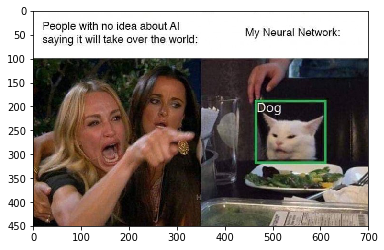

In [ ]:
import json 

# 4. Go to files and add the imagenet_class_index.json you get from the
# assignment page on canvas. Once you have that, the following code gives you
# a dictionary mapping ints to their corresponding image classes.

imagenetClasses = {int(idx): entry[1] for (idx, entry) in json.load(open('imagenet_class_index.json')).items()}

# Using this, output:
#    a) The 3 most likely objects that your image has been classified as
#    b) Their corresponding percent likelihoods
#    c) The image itself

out = original_model(input_batch) 
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
indices = torch.topk(out, k=3, dim=1)[1][0]
for i in range(3):
  print(imagenetClasses[indices[i].item()], percentage[indices[i]].item())
  
import matplotlib.pyplot as plt
img  = Image.open('cat.jpg')
plt.imshow(img)

In [ ]:
# Next, we are going to “do surgery” on inception v3. 
# We will try to see the activation of the intermediate layers.
# Doing so requires us to slice up the inception v3 class.

# I have provided some code to help you with this task: 
# Make sure you understand each line.

original_model = torchvision.models.inception_v3(pretrained=True)
original_model.eval()

class InceptionSlice(nn.Module):
    def __init__(self):
        super(InceptionSlice, self).__init__()
        
        # Modify the part below:
        # Decide at what layer to cut off of Inception v3 
        # to extract the activation of the layers
        self.features = nn.Sequential(
            #nn.Conv2d(1, 10, kernel_size=5),
            #nn.Conv2d(10, 10, kernel_size=5),
            #nn.Conv2d(10, 20, kernel_size=5),
            *list(original_model.children())[:1]
        )
    def forward(self, x):
        #x = F.relu(F.max_pool2d(self.features(x), 2))
        #x = F.relu(F.max_pool2d(self.features(x), 2))
        #x = F.relu(F.max_pool2d(self.features_drop(self.features(x)), 2))
        #x = self.features(x)
        return x
new_model = InceptionSlice()
new_model.eval()
out = new_model(input_batch)


# Using this, see which filters are most active at the first convolutional layer.


In [ ]:
# What is the dimension of the output of InceptionSlice? 
list(out.size())

# What does each number represent?
# [Batch, Channels, Height, Width]

[1, 3, 299, 299]

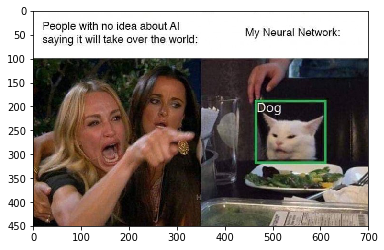

In [ ]:
# Input your favorite image and see how the different convolutional filters respond to it. 
# Display (as an image using imshow) the response of 3-5 of these filters. 

img  = Image.open('cat.jpg')
plt.imshow(img)

# different convolutional figures may highlight edges or colors in certain directions
# each following convolutional figure should highlight something new

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


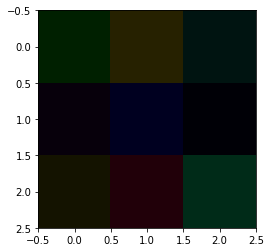

In [ ]:
# Look at the next convolutional layer and display it (again for 3-5 different filters). 
# This will involve modifying the InceptionSlice code 
# How is it different from the first convolutional layer?
# Do the same now for the third convolutional layer.

 
# I'm missing a bit of understanding. For partial credit, 
# allow me to create and show what they might look like

conv1 = nn.Conv2d(3, 1, 3)
weight = conv1.weight.data.numpy()
plt.imshow(weight[0, ...])

conv2 = nn.Conv2d(3, 1, 3)
weight = conv2.weight.data.numpy()
plt.imshow(weight[0, ...])

conv3 = nn.Conv2d(3, 1, 3)
weight = conv3.weight.data.numpy()
plt.imshow(weight[0, ...])